# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [44]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve
!pip install graphviz
from sklearn.tree import export_graphviz
import graphviz

     |████████████████████████████████| 46 kB 2.5 MB/s eta 0:00:01


## Part 1: Gradient Descent

### Set Up

In [2]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [3]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


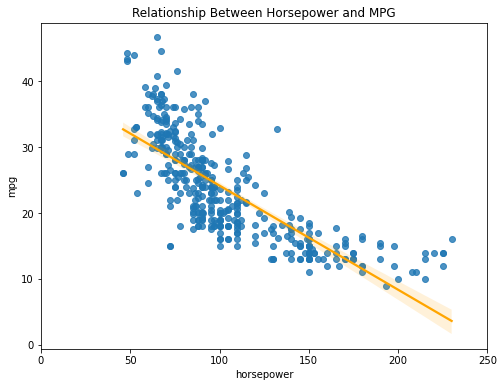

In [4]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](img/slope-rss-relationship.png)

In [5]:
# call_on_students(1)

#### Answer: 

- This chart shows us the relationship between slope and the RSS in our model. This helps to tell us where the optimal RSS score is, where the slope is as close to zero as possible. Here it shows to be around 9400 RSS

- From this graph you can see that it arrived around -.158 for the optimal coefficient value, since its aroun that point that the 

- Gradient descent finds the optimal parameter, the optimal parameter is where the tangent line = 0

### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

In [48]:
# call_on_students(1)

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [49]:
# call_on_students(1)

#### Answer: 

- Step size is how far down the curve we go trying to find the optimal slope. As the slope gets closer to zero, step sizes become smaller, until we get close to zero

- Learning rate determines how large those steps are to start
- Step size captures the amount to change the coefficient as it tries to minimize the error term


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [50]:
# call_on_students(1)

#### Answer: 

- Logistic regression is used for discrete categorical targets

- Coefficients come out in terms of log odds 

- LogReg makes binary predictions, typically 1 or 0s that represent event or non-events 

- Linear regression is used for continuous, numerical targets. 

- LogReg evaluation metrics include accuracy, recall, precision, f1

- LinReg evaluation metrics include R^2, MSE, RMSE, MAE etc. 

- Both are parametric.

- Used for classification problems



### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [51]:
# call_on_students(1)

#### Answer: 

- LogReg would be used when you have categorical variables, and output is binary classification
- Since they are both numeric and continuous, it would make more sense to use a linear regression to understand relationship between MPG and Horsepower


Pros 
- LogReg is faster, less computational power
- LogReg is more predictive  by giviing estimates of predictors 

Cons
- Less interpretable than say a decision tree
- Less visual than decision trees
- Need to pre-processing if you want to use regularization, as opposed to a decision tree



Cons of Decision tree
- no coefficient

Pros of Decision tree
- feature importance 

## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [52]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [53]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [54]:
# call_on_students(1)

In [55]:
# Train-test split
# Set test_size=0.33 and random_state=42

X = mpg_class.drop(columns='target')
y = mpg_class['target']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.33,random_state=42)

In [11]:
# Scale the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [ ]:
# call_on_students(1)

#### Part 1: explore the target column breakdown in train data

In [17]:
# Code to explore
X_train_scaled.shape

(262, 7)

In [56]:
y_train.value_counts(normalize=True)

0    0.744275
1    0.255725
Name: target, dtype: float64

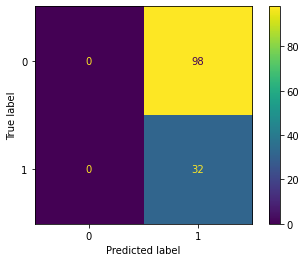

In [19]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.dummy import DummyClassifier

plot_confusion_matrix(DummyClassifier(strategy='constant', constant=1).fit(X_train, y_train), X_test, y_test);

#### Answer:

- 


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- Our baseline would be a model that choses 0 each time , because that is the majority class

- This model would always predict new data points to be 0

#### Part 3: How accurate would that baseline be on test data?


In [58]:
# Code to find the answer
baseline_accruacy = 98/(98+32)
baseline_accruacy

0.7538461538461538

#### Answer:

- 75%


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [59]:
# call_on_students(1)

#### Answer:

- The training data is imbalanced, SMOTE would help to add data to the minority class

- You can also undersample, but don't want to do that on small data sets 


### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [60]:
# call_on_students(1)

In [61]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state = 42)

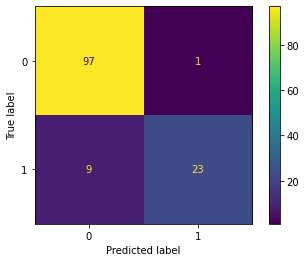

In [63]:
# Plot a confusion matrix on the test data
logreg.fit(X_train_scaled,y_train)
plot_confusion_matrix(logreg,X_test_scaled,y_test)

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [69]:
tp = 23
tn = 97
fp = 1
fn = 9

In [70]:
# Accuracy
accuracy = (tp+tn)/(tp+tn+fp+fn)
accuracy

0.9230769230769231

In [71]:
# Precision
precision = (tp)/(tp+fp)
precision

0.9583333333333334

In [72]:
# Recall
recall = tp/(tp+fn)
recall

0.71875

In [73]:
# F1-Score
f1_score = (2*tp)/((2*tp)+fp+fn)
f1_score

0.8214285714285714

### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [74]:
# call_on_students(1)

In [88]:
# Calculate roc-auc

test_probas = logreg.predict_proba(X_test_scaled)[:,1]

roc_auc_score(y_test,test_probas )

0.9811862244897959

In [90]:
X_test

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
78,4,96.0,69,2189,18.0,72,2
274,4,121.0,115,2795,15.7,78,2
246,4,91.0,60,1800,16.4,78,3
55,4,91.0,70,1955,20.5,71,1
387,4,140.0,86,2790,15.6,82,1
...,...,...,...,...,...,...,...
232,4,151.0,88,2740,16.0,77,1
193,4,85.0,52,2035,22.2,76,1
238,4,97.0,78,2190,14.1,77,2
152,6,250.0,72,3432,21.0,75,1


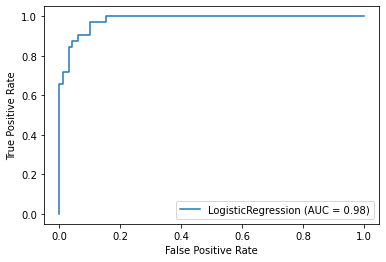

In [87]:
# Plot the ROC curve
plot_roc_curve(logreg, X_test_scaled, y_test)

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [ ]:
# call_on_students(1)

#### Answer:

- Our model may be  overfitting


## Part 4: Decision Trees

### Set Up


In [45]:
# Helper function from a colleague (h/t Bryan)
def plot_tree(dt, used_cols, out_file='mytree.dot'):
    export_graphviz(dt, out_file=out_file, 
                    filled=True, feature_names=used_cols, 
                    leaves_parallel=True, node_ids=True)
    with open(out_file) as f:
        dot_graph = f.read()
    return graphviz.Source(dot_graph)

In [46]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

In [47]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, ['weight'])

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, ['origin'])

#### Images:

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](img/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](img/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

-  Version 1 - Weight,  gini score in version 2 is closer to .5 , which implies the nodes are more disordered


### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [ ]:
# call_on_students(1)

In [91]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state=42)

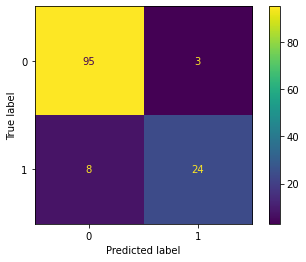

In [95]:
# Plot a confusion matrix on the test data
dt.fit(X_train_scaled,y_train)
plot_confusion_matrix(dt,X_test_scaled,y_test)

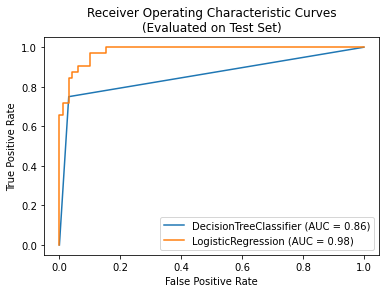

In [96]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test_scaled, y_test, ax=ax)
plot_roc_curve(logreg, X_test_scaled, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- Decision tree classifier based on score, but seems to be overfitting
